<a href="https://colab.research.google.com/github/vnylp/JupyterNotebookCodes/blob/master/Advanced_Predictive_Modeling_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Predictive Modeling Assignment

## Step 1: Load the Data

In [ ]:

import pandas as pd

data_path = '/content/data (1).csv'
data_csv = pd.read_csv(data_path)

# Display the first few rows of the dataset to understand its structure and the column names
data_csv.head()

,timestamp,part_id,temperature_1,temperature_2,temperature_3,temperature_4,label
0,2024-02-15 05:44:34+05:30,2124077390649042,439.1,424.1,536.0,518.6,0
1,2024-02-15 05:44:35+05:30,2124077390649042,438.9,423.9,535.9,518.7,0
2,2024-02-15 05:44:36+05:30,2124077390649042,438.7,423.6,535.6,518.9,0
3,2024-02-15 05:44:37+05:30,2124077390649042,438.4,423.4,535.4,519.0,0
4,2024-02-15 05:44:38+05:30,2124077390649042,438.2,423.2,535.2,519.2,0


## Step 2: Advanced Feature Engineering

In [ ]:
# Correctly compute and align features with labels for each part_id
features_list = []

# Loop through each unique part_id to compute rolling features and align labels
for part_id, group in data_csv.groupby('part_id'):
    # Calculate rolling statistics for each sensor
    rolling_features = group.rolling(window=k, on='timestamp')
    features = {
        'temperature_1_max': rolling_features['temperature_1'].max(),
        'temperature_2_max': rolling_features['temperature_2'].max(),
        'temperature_3_max': rolling_features['temperature_3'].max(),
        'temperature_4_max': rolling_features['temperature_4'].max(),
        'temperature_1_min': rolling_features['temperature_1'].min(),
        'temperature_2_min': rolling_features['temperature_2'].min(),
        'temperature_3_min': rolling_features['temperature_3'].min(),
        'temperature_4_min': rolling_features['temperature_4'].min(),
        'temperature_1_std': rolling_features['temperature_1'].std(),
        'temperature_2_std': rolling_features['temperature_2'].std(),
        'temperature_3_std': rolling_features['temperature_3'].std(),
        'temperature_4_std': rolling_features['temperature_4'].std(),
        'label': group['label'].values
    }
    features_df = pd.DataFrame(features)
    features_df = features_df.shift(-k+1)  # Align the label at the end of the window
    features_list.append(features_df)

# Combine all features into one DataFrame
all_features = pd.concat(features_list, axis=0)
all_features.dropna(inplace=True)  # Drop rows with NaN values from rolling and shifting

# Display the corrected feature dataset
all_features.head()


,temperature_1_max,temperature_2_max,temperature_3_max,temperature_4_max,temperature_1_min,temperature_2_min,temperature_3_min,temperature_4_min,temperature_1_std,temperature_2_std,temperature_3_std,temperature_4_std,label
0,439.1,424.1,536.0,519.2,438.2,423.2,535.2,518.6,0.364692,0.364692,0.334664,0.238747,0.0
1,438.9,423.9,535.9,519.2,438.1,423.0,535.0,518.7,0.336155,0.349285,0.349285,0.212132,0.0
2,438.7,423.6,535.6,519.4,437.9,422.7,534.7,518.9,0.304959,0.349285,0.349285,0.194936,0.0
3,438.4,423.4,535.4,519.5,437.7,422.5,534.6,519.0,0.270185,0.364692,0.334664,0.194936,0.0
4,438.2,423.2,535.2,519.6,437.5,422.3,534.4,519.2,0.286356,0.364692,0.319374,0.178885,0.0


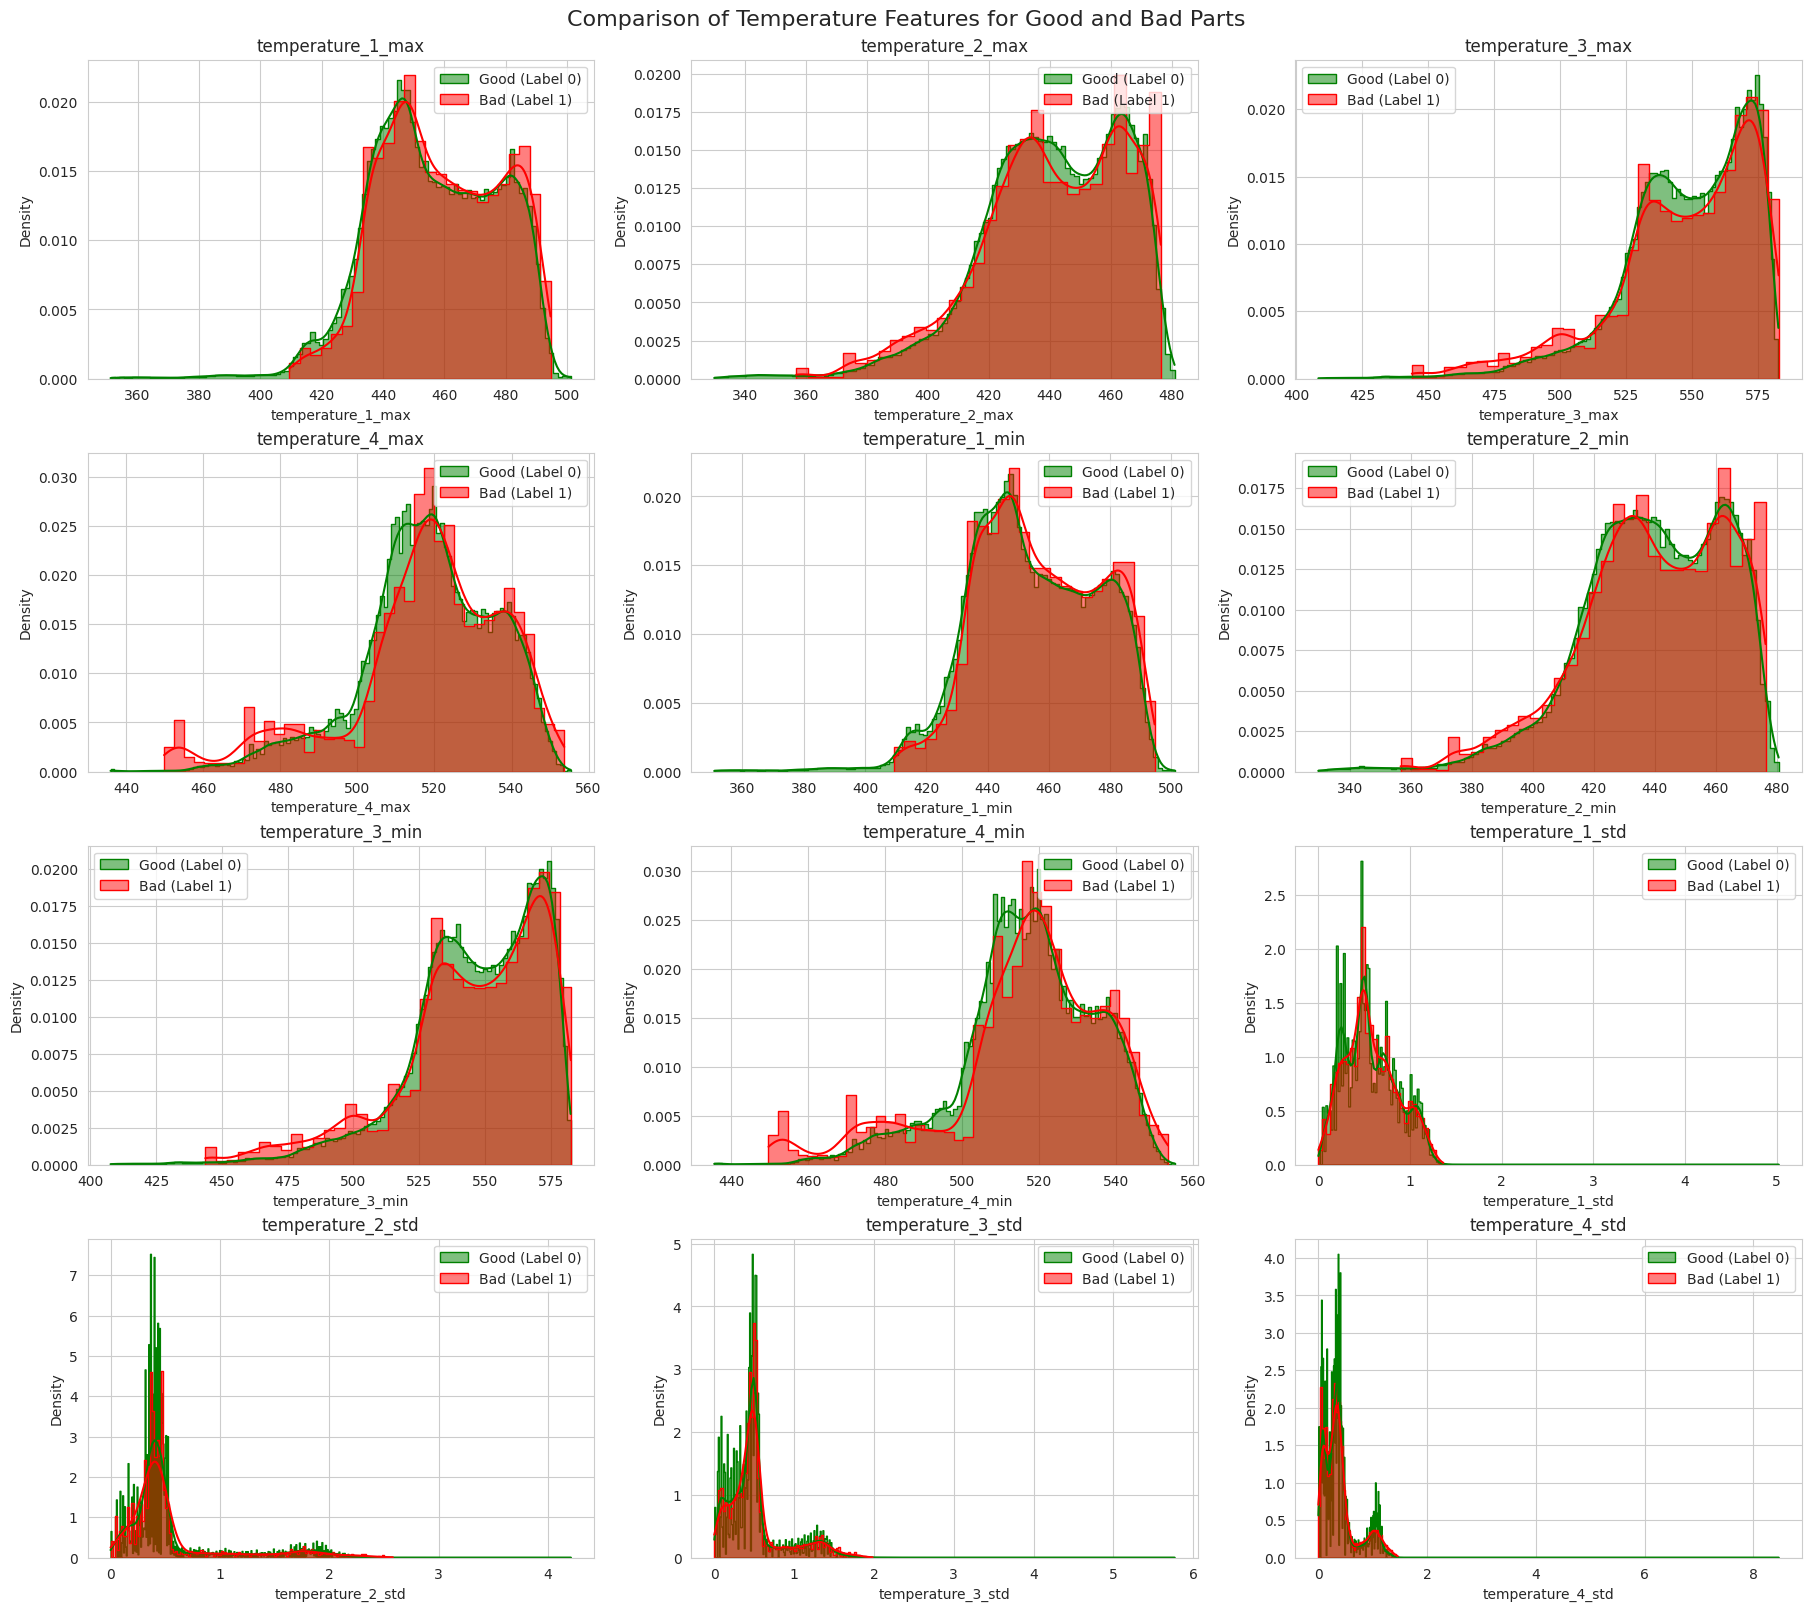

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Filter data for good and bad parts
good_parts = all_features[all_features['label'] == 0]
bad_parts = all_features[all_features['label'] == 1]

# Prepare the figure for multiple subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16), constrained_layout=True)
fig.suptitle('Comparison of Temperature Features for Good and Bad Parts', fontsize=16)

# List of features to plot
features_to_plot = ['temperature_1_max', 'temperature_2_max', 'temperature_3_max', 'temperature_4_max',
                    'temperature_1_min', 'temperature_2_min', 'temperature_3_min', 'temperature_4_min',
                    'temperature_1_std', 'temperature_2_std', 'temperature_3_std', 'temperature_4_std']

# Plot each feature
for ax, feature in zip(axes.flatten(), features_to_plot):
    sns.histplot(good_parts[feature], color="green", kde=True, label='Good (Label 0)', ax=ax, element="step", stat="density")
    sns.histplot(bad_parts[feature], color="red", kde=True, label='Bad (Label 1)', ax=ax, element="step", stat="density")
    ax.set_title(feature)
    ax.legend()

plt.show()


[Insights from Charts](https://docs.google.com/document/d/18k0HBQvhuL3uA3CcNKixLNDPyWMzo0QP-JTJ10MsZcg/edit?usp=sharing)

## Step 3: Modeling with Complex Algorithms

In [ ]:
all_features.columns

Index(['temperature_1_max', 'temperature_2_max', 'temperature_3_max',
       'temperature_4_max', 'temperature_1_min', 'temperature_2_min',
       'temperature_3_min', 'temperature_4_min', 'temperature_1_std',
       'temperature_2_std', 'temperature_3_std', 'temperature_4_std', 'label'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Define features and target
X = all_features.drop(['label'], axis=1)
y = all_features['label']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


accuracy,report

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.9419145921878163,
 '              precision    recall  f1-score   support\n\n         0.0       0.94      1.00      0.97     18616\n         1.0       0.00      0.00      0.00      1148\n\n    accuracy                           0.94     19764\n   macro avg       0.47      0.50      0.49     19764\nweighted avg       0.89      0.94      0.91     19764\n')

[Feature engineering approach trials and EDA further insights](https://docs.google.com/document/d/18k0HBQvhuL3uA3CcNKixLNDPyWMzo0QP-JTJ10MsZcg/edit)

Now I am using insights and building additional feature and try again

In [ ]:
# Adding threshold-based features for critical temperature zones
data_csv['temp1_above_460'] = data_csv['temperature_1'].apply(lambda x: 1 if x > 460 else 0)
data_csv['temp3_above_480'] = data_csv['temperature_3'].apply(lambda x: 1 if x > 480 else 0)

# Recalculate the features with the new threshold features included
grouped = data_csv.groupby('part_id')
windows = grouped.rolling(window=k, min_periods=k)

# Include new sum features for threshold crossings in the feature set
new_features = windows.agg({
    'temperature_1': ['max', 'min', 'std'],
    'temperature_2': ['max', 'min', 'std'],
    'temperature_3': ['max', 'min', 'std'],
    'temperature_4': ['max', 'min', 'std'],
    'temp1_above_460': 'sum',
    'temp3_above_480': 'sum'
}).dropna()

# Flatten multi-level column names
new_features.columns = ['_'.join(col).strip() for col in new_features.columns.values]

# Reset index to merge with the main data frame
new_features.reset_index(inplace=True)

# Get the label for the last part in the window
new_features['label'] = grouped['label'].apply(lambda x: x.shift(-k+1)).reset_index(level=0, drop=True)

# Drop rows where the label is NaN (end of each group where we don't have full window data for label)
new_features.dropna(subset=['label'], inplace=True)

# Define features and target for the new dataset
X_new = new_features.drop(['part_id', 'level_1', 'label'], axis=1)
y_new = new_features['label']

# Splitting the dataset into training and testing sets
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model with the new features
model_new = LogisticRegression(max_iter=1000)
model_new.fit(X_train_new, y_train_new)

# Predictions and evaluation with the new model
y_pred_new = model_new.predict(X_test_new)
accuracy_new = accuracy_score(y_test_new, y_pred_new)
report_new = classification_report(y_test_new, y_pred_new)

accuracy_new, report_new


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.942862994061028,
 '              precision    recall  f1-score   support\n\n         0.0       0.94      1.00      0.97     18416\n         1.0       0.00      0.00      0.00      1116\n\n    accuracy                           0.94     19532\n   macro avg       0.47      0.50      0.49     19532\nweighted avg       0.89      0.94      0.92     19532\n')

Went to rf

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier with class weight balanced
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

# Train the model using the new features dataset
rf_model.fit(X_train_new, y_train_new)

# Predictions and evaluation with the Random Forest model
y_pred_rf = rf_model.predict(X_test_new)
accuracy_rf = accuracy_score(y_test_new, y_pred_rf)
report_rf = classification_report(y_test_new, y_pred_rf)

accuracy_rf, report_rf


(0.9640077821011673,
 '              precision    recall  f1-score   support\n\n         0.0       0.96      1.00      0.98     18416\n         1.0       0.98      0.38      0.54      1116\n\n    accuracy                           0.96     19532\n   macro avg       0.97      0.69      0.76     19532\nweighted avg       0.96      0.96      0.96     19532\n')

## 4. Advance feature building

In [ ]:
# Convert timestamp to datetime and extract time-based features
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['hour'] = data['timestamp'].dt.hour
data['part_of_day'] = pd.cut(data['hour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False)

# Calculate rolling statistics for temperature sensors
window_size = 5  # Example window size for rolling calculations
for sensor in ['temperature_1', 'temperature_2', 'temperature_3', 'temperature_4']:
    data[f'{sensor}_rolling_avg'] = data[sensor].rolling(window=window_size).mean()
    data[f'{sensor}_rolling_std'] = data[sensor].rolling(window=window_size).std()

# Calculate differences between sensors
data['temp_diff_12'] = data['temperature_1'] - data['temperature_2']
data['temp_diff_34'] = data['temperature_3'] - data['temperature_4']
data['temp_mean'] = data[['temperature_1', 'temperature_2', 'temperature_3', 'temperature_4']].mean(axis=1)

# Display updated DataFrame with new features
data[['hour', 'part_of_day', 'temperature_1_rolling_avg', 'temperature_1_rolling_std', 'temp_diff_12', 'temp_diff_34', 'temp_mean']].head()


,hour,part_of_day,temperature_1_rolling_avg,temperature_1_rolling_std,temp_diff_12,temp_diff_34,temp_mean
0,0,Night,NaN,NaN,15.0,17.4,479.45
1,0,Night,NaN,NaN,15.0,17.2,479.35
2,0,Night,NaN,NaN,15.1,16.7,479.20
3,0,Night,NaN,NaN,15.0,16.4,479.05
4,0,Night,438.66,0.364692,15.0,16.0,478.95


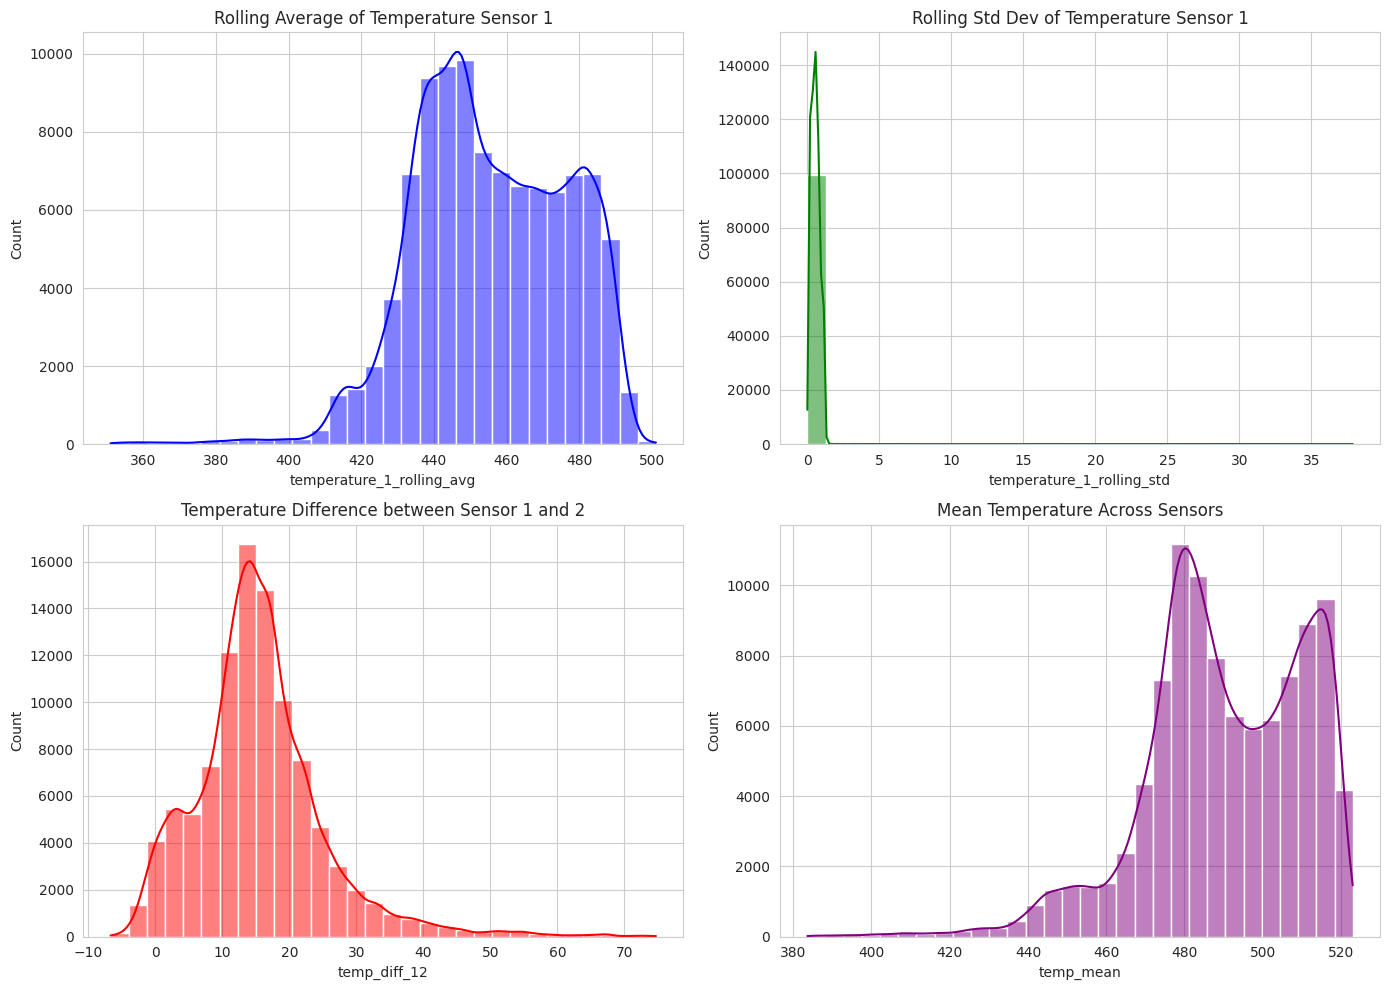

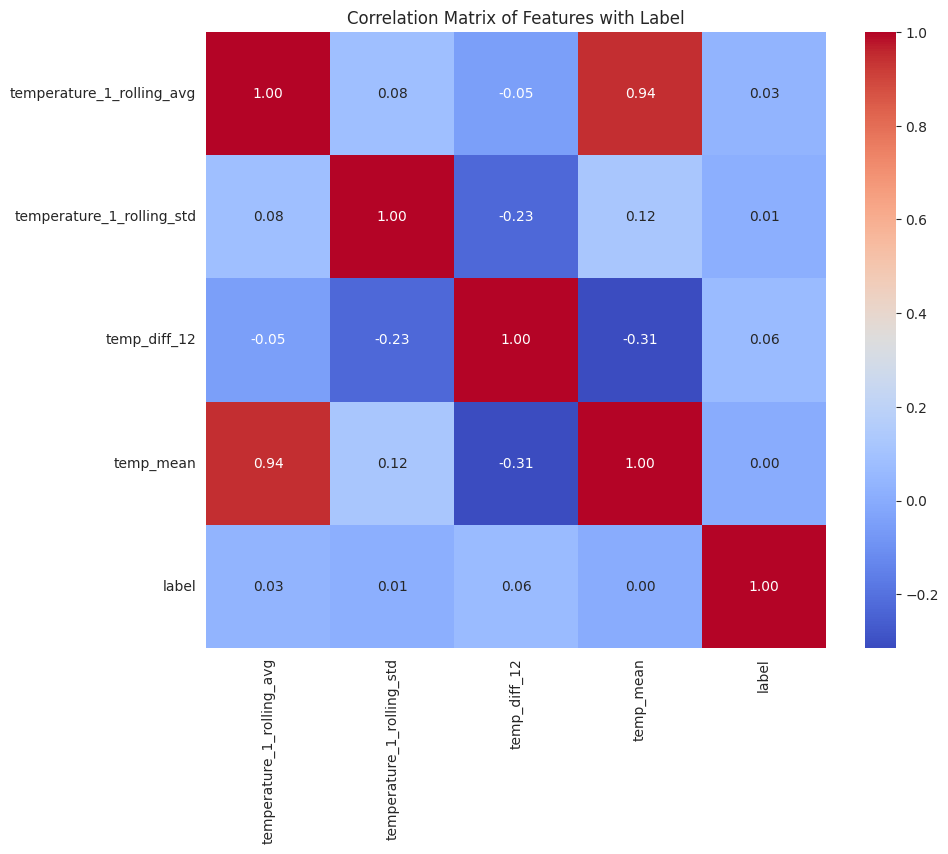

In [ ]:
# Drop rows with NaN values created by rolling calculations
data_clean = data.dropna()

# Plotting distributions of some new features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Rolling average temperature 1
sns.histplot(data_clean['temperature_1_rolling_avg'], bins=30, kde=True, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Rolling Average of Temperature Sensor 1')

# Rolling standard deviation temperature 1
sns.histplot(data_clean['temperature_1_rolling_std'], bins=30, kde=True, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Rolling Std Dev of Temperature Sensor 1')

# Temperature difference between sensors 1 and 2
sns.histplot(data_clean['temp_diff_12'], bins=30, kde=True, ax=axes[1, 0], color='red')
axes[1, 0].set_title('Temperature Difference between Sensor 1 and 2')

# Mean temperature across sensors
sns.histplot(data_clean['temp_mean'], bins=30, kde=True, ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Mean Temperature Across Sensors')

plt.tight_layout()
plt.show()

# Correlation matrix for new features and label
correlation_matrix = data_clean[['temperature_1_rolling_avg', 'temperature_1_rolling_std', 'temp_diff_12', 'temp_mean', 'label']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features with Label')
plt.show()


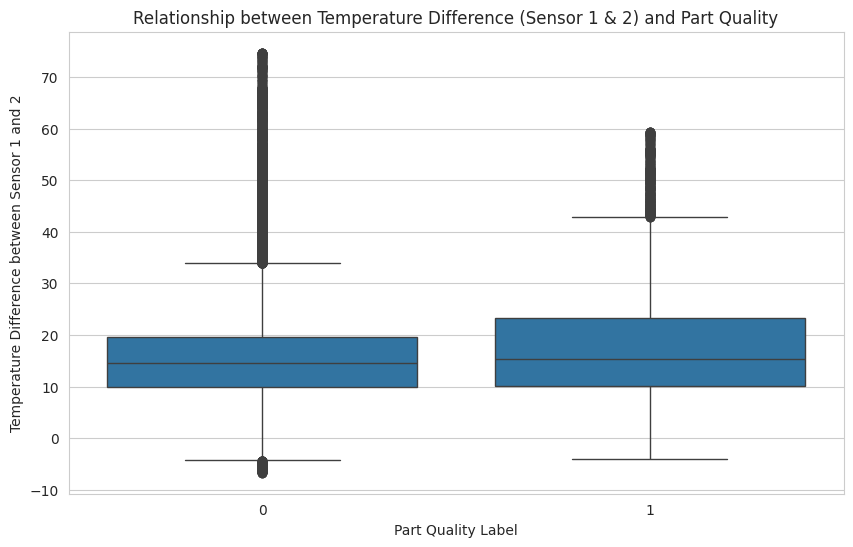

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the relationship between temperature difference and label with respect to part quality
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='temp_diff_12', data=data_full_features)
plt.title('Relationship between Temperature Difference (Sensor 1 & 2) and Part Quality')
plt.xlabel('Part Quality Label')
plt.ylabel('Temperature Difference between Sensor 1 and 2')
plt.show()


Visualization: Temperature Difference vs. Part Quality
The boxplot shows the relationship between the temperature difference between Sensor 1 and Sensor 2 (temp_diff_12) and the part quality label (0 for good, 1 for bad):

For parts labeled as good (0), the temperature differences tend to cluster around a narrower range with fewer outliers, suggesting a more stable temperature gradient between these two sensors.
For parts labeled as bad (1), the distribution of temperature differences is slightly wider and includes more extreme values. This could indicate that more significant fluctuations or variations in temperature between these sensors are associated with the production of defective parts.
Key Insights:
The wider spread and higher variability in temperature differences for bad parts might be useful in predicting part defects.
This feature appears to have some discriminatory power and may help the model to better identify bad parts, as suggested by the presence of outliers and broader interquartile ranges for label 1.

In [ ]:
# Calculating additional statistical features over the specified window
window_size = 5  # Using the same window size for consistency

# Maximum, minimum, and standard deviation for each temperature sensor
for sensor in ['temperature_1', 'temperature_2', 'temperature_3', 'temperature_4']:
    data[f'{sensor}_max'] = data[sensor].rolling(window=window_size).max()
    data[f'{sensor}_min'] = data[sensor].rolling(window=window_size).min()
    data[f'{sensor}_std'] = data[sensor].rolling(window=window_size).std()

# Calculating condition-based sums
data['temp1_above_460_sum'] = data['temperature_1'].rolling(window=window_size).apply(lambda x: (x > 460).sum())
data['temp3_above_480_sum'] = data['temperature_3'].rolling(window=window_size).apply(lambda x: (x > 480).sum())

# Ensure all rolling calculations are completed and NaNs removed
data_full_features = data.dropna()

# Display updated DataFrame with new features
data_full_features[['temperature_1_max', 'temperature_1_min', 'temperature_1_std',
                    'temperature_2_max', 'temperature_2_min', 'temperature_2_std',
                    'temperature_3_max', 'temperature_3_min', 'temperature_3_std',
                    'temperature_4_max', 'temperature_4_min', 'temperature_4_std',
                    'temp1_above_460_sum', 'temp3_above_480_sum']].head()


,temperature_1_max,temperature_1_min,temperature_1_std,temperature_2_max,temperature_2_min,temperature_2_std,temperature_3_max,temperature_3_min,temperature_3_std,temperature_4_max,temperature_4_min,temperature_4_std,temp1_above_460_sum,temp3_above_480_sum
4,439.1,438.2,0.364692,424.1,423.2,0.364692,536.0,535.2,0.334664,519.2,518.6,0.238747,0.0,5.0
5,438.9,438.1,0.336155,423.9,423.0,0.349285,535.9,535.0,0.349285,519.2,518.7,0.212132,0.0,5.0
6,438.7,437.9,0.304959,423.6,422.7,0.349285,535.6,534.7,0.349285,519.4,518.9,0.194936,0.0,5.0
7,438.4,437.7,0.270185,423.4,422.5,0.364692,535.4,534.6,0.334664,519.5,519.0,0.194936,0.0,5.0
8,438.2,437.5,0.286356,423.2,422.3,0.364692,535.2,534.4,0.319374,519.6,519.2,0.178885,0.0,5.0


In [ ]:
# Selecting expanded set of relevant features
expanded_feature_columns = [
    'temperature_1_rolling_avg', 'temperature_1_rolling_std', 'temperature_1_max', 'temperature_1_min', 'temperature_1_std',
    'temperature_2_max', 'temperature_2_min', 'temperature_2_std',
    'temperature_3_max', 'temperature_3_min', 'temperature_3_std',
    'temperature_4_max', 'temperature_4_min', 'temperature_4_std',
    'temp_diff_12', 'temp_mean', 'temp1_above_460_sum', 'temp3_above_480_sum'
]

X_expanded = data_full_features[expanded_feature_columns]
y_expanded = data_full_features['label']

# Splitting data into train and test sets for the expanded feature set
X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(X_expanded, y_expanded, test_size=0.2, random_state=42, stratify=y_expanded)

# Reinitialize and train the Random Forest classifier with expanded features
rf_classifier_exp = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_exp.fit(X_train_exp, y_train_exp)

# Predict on the test set with expanded features
y_pred_exp = rf_classifier_exp.predict(X_test_exp)



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


accuracy_exp = rf_classifier_exp.score(X_test_exp, y_test_exp)
conf_matrix_exp = confusion_matrix(y_test_exp, y_pred_exp)
class_report_exp = classification_report(y_test_exp, y_pred_exp)

accuracy_exp, conf_matrix_exp, class_report_exp

(0.9722,
 array([[18806,     0],
        [  556,   638]]),
 '              precision    recall  f1-score   support\n\n           0       0.97      1.00      0.99     18806\n           1       1.00      0.53      0.70      1194\n\n    accuracy                           0.97     20000\n   macro avg       0.99      0.77      0.84     20000\nweighted avg       0.97      0.97      0.97     20000\n')

Addition of 1 3 temp and 1 4 temp further

In [ ]:
# Calculate additional temperature differences
data_full_features['temp_diff_13'] = data_full_features['temperature_1'] - data_full_features['temperature_3']
data_full_features['temp_diff_14'] = data_full_features['temperature_1'] - data_full_features['temperature_4']

# Update the feature list to include the new temperature differences
expanded_feature_columns += ['temp_diff_13', 'temp_diff_14']

# Select the updated set of features for the model
X_expanded = data_full_features[expanded_feature_columns]

# Re-splitting data into train and test sets for the updated feature set
X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(
    X_expanded, y_expanded, test_size=0.2, random_state=42, stratify=y_expanded
)

# Reinitialize and train the Random Forest classifier with the updated features
rf_classifier_exp = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_exp.fit(X_train_exp, y_train_exp)

# Predict on the test set with the updated features
y_pred_exp = rf_classifier_exp.predict(X_test_exp)

# Evaluate the updated model
accuracy_exp_updated = rf_classifier_exp.score(X_test_exp, y_test_exp)
conf_matrix_exp_updated = confusion_matrix(y_test_exp, y_pred_exp)
class_report_exp_updated = classification_report(y_test_exp, y_pred_exp)

accuracy_exp_updated, conf_matrix_exp_updated, class_report_exp_updated


<ipython-input-32-09f6797e7e84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_full_features['temp_diff_13'] = data_full_features['temperature_1'] - data_full_features['temperature_3']
<ipython-input-32-09f6797e7e84>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_full_features['temp_diff_14'] = data_full_features['temperature_1'] - data_full_features['temperature_4']


(0.9784,
 array([[18805,     1],
        [  431,   763]]),
 '              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99     18806\n           1       1.00      0.64      0.78      1194\n\n    accuracy                           0.98     20000\n   macro avg       0.99      0.82      0.88     20000\nweighted avg       0.98      0.98      0.98     20000\n')

Now let's try all combo of temp difference between sensors[link text](https://)

In [ ]:
# Calculate temperature differences for all sensor pairs
sensor_pairs = [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4)]
for i, j in sensor_pairs:
    data_full_features[f'temp_diff_{i}{j}'] = data_full_features[f'temperature_{i}'] - data_full_features[f'temperature_{j}']

# Update the expanded feature columns list to include all sensor differences
expanded_feature_columns = [
    col for col in data_full_features.columns if 'temp_diff' in col or col in [
        'temperature_1_rolling_avg', 'temperature_1_rolling_std',
        'temperature_1_max', 'temperature_1_min', 'temperature_1_std',
        'temperature_2_max', 'temperature_2_min', 'temperature_2_std',
        'temperature_3_max', 'temperature_3_min', 'temperature_3_std',
        'temperature_4_max', 'temperature_4_min', 'temperature_4_std',
        'temp1_above_460_sum', 'temp3_above_480_sum', 'temp_mean'
    ]
]

# Prepare data with the updated features
X_expanded = data_full_features[expanded_feature_columns]

# Split data into train and test sets
X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(
    X_expanded, y_expanded, test_size=0.2, random_state=42, stratify=y_expanded
)

# Initialize and train the Random Forest classifier with all features
rf_classifier_all_diffs = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_all_diffs.fit(X_train_exp, y_train_exp)

# Predict on the test set with all features
y_pred_all_diffs = rf_classifier_all_diffs.predict(X_test_exp)

# Evaluate the model with all features
accuracy_all_diffs = rf_classifier_all_diffs.score(X_test_exp, y_test_exp)
conf_matrix_all_diffs = confusion_matrix(y_test_exp, y_pred_all_diffs)
class_report_all_diffs = classification_report(y_test_exp, y_pred_all_diffs)

accuracy_all_diffs, conf_matrix_all_diffs, class_report_all_diffs


<ipython-input-33-6e2c18564b22>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_full_features[f'temp_diff_{i}{j}'] = data_full_features[f'temperature_{i}'] - data_full_features[f'temperature_{j}']
<ipython-input-33-6e2c18564b22>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_full_features[f'temp_diff_{i}{j}'] = data_full_features[f'temperature_{i}'] - data_full_features[f'temperature_{j}']
<ipython-input-33-6e2c18564b22>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

(0.98135,
 array([[18805,     1],
        [  372,   822]]),
 '              precision    recall  f1-score   support\n\n           0       0.98      1.00      0.99     18806\n           1       1.00      0.69      0.82      1194\n\n    accuracy                           0.98     20000\n   macro avg       0.99      0.84      0.90     20000\nweighted avg       0.98      0.98      0.98     20000\n')

Now what contributes more for sensor becoming bad

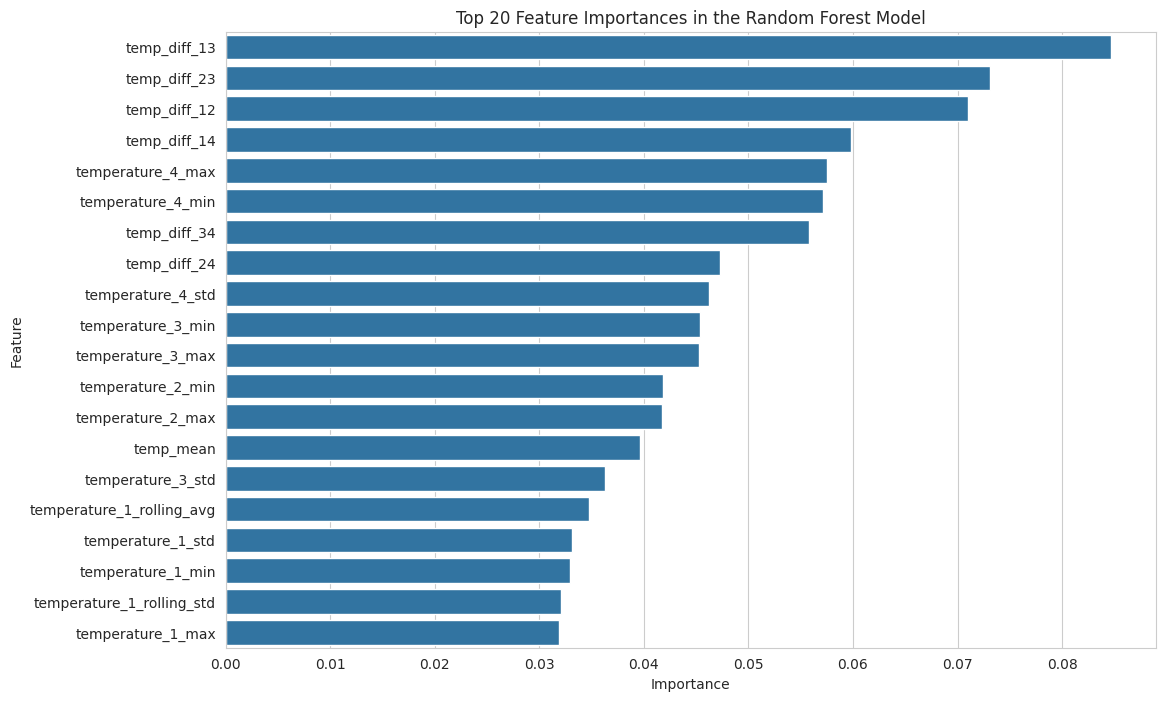

,Feature,Importance
19,temp_diff_13,0.084717
21,temp_diff_23,0.073118
2,temp_diff_12,0.071000
20,temp_diff_14,0.059838
14,temperature_4_max,0.057547
15,temperature_4_min,0.057097
3,temp_diff_34,0.055801
22,temp_diff_24,0.047309
16,temperature_4_std,0.046236
12,temperature_3_min,0.045341


In [ ]:
# Extracting feature importances from the Random Forest model
feature_importances = rf_classifier_all_diffs.feature_importances_
features_df = pd.DataFrame({
    'Feature': X_train_exp.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Visualizing the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x="Importance", y="Feature", data=features_df.head(20))
plt.title('Top 20 Feature Importances in the Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Display the top features in tabular format for detailed view
features_df.head(20)


[Recommendation](https://docs.google.com/document/d/18k0HBQvhuL3uA3CcNKixLNDPyWMzo0QP-JTJ10MsZcg/edit?usp=sharing)